<a href="https://colab.research.google.com/github/DS3001/group19/blob/main/project_2/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cleansing

In [38]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsRegressor as kNNRegression

df_test = pd.read_csv('https://raw.githubusercontent.com/aniishap/group-19/main/project_2/data/testing_data.csv')
df_train = pd.read_csv('https://raw.githubusercontent.com/aniishap/group-19/main/project_2/data/training_data.csv')

In [39]:
df_train = df_train[df_train['gender'] != 'Other'].reset_index(drop=True)

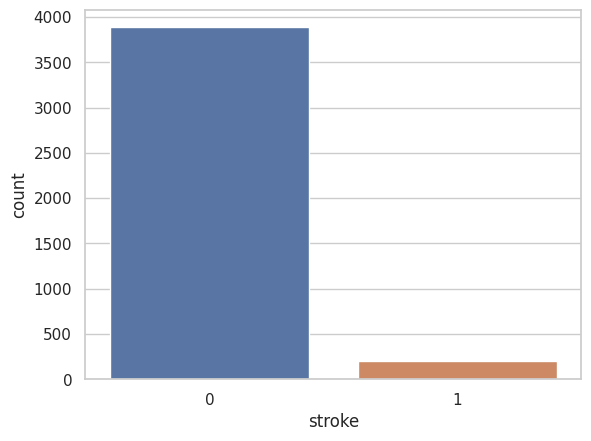

0    3887
1     199
Name: stroke, dtype: int64


In [40]:
sns.countplot(x='stroke', data=df_train)
plt.show()
stroke_counts = df_train['stroke'].value_counts()
print(stroke_counts)

# Demonstrating the total count of 'stroke' incidences in the training data

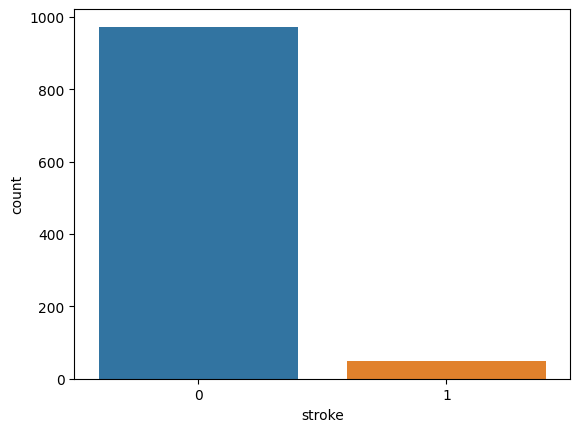

0    973
1     50
Name: stroke, dtype: int64


In [4]:
sns.countplot(x='stroke', data=df_test)
plt.show()
stroke_counts2 = df_test['stroke'].value_counts()
print(stroke_counts2)

# Demonstrating the total count of 'stroke' incidences in the testing data

In [41]:
df_train.isnull().sum() #  bmi column has a total of 159 missing values

Unnamed: 0             0
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  159
smoking_status         0
stroke                 0
dtype: int64

In [42]:
df_test.isnull().sum() #  bmi column has a total of 42 missing values


Unnamed: 0            0
id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  42
smoking_status        0
stroke                0
dtype: int64

In [43]:
# I am going to impute the averages of the 'bmi' column instead of dropping those rows to maintain sample size and avoid bias within the dataset
#for purposes of checking code later, here are the current means for eqch bmi column
avg_train = df_train['bmi'].mean()
avg_test = df_test['bmi'].mean()
print(avg_train)
print(avg_test)

df_train['bmi'] = df_train['bmi'].fillna(df_train['bmi'].mean())

df_test['bmi'] = df_test['bmi'].fillna(df_test['bmi'].mean())

print(df_test['bmi'], '\n')

#now check for missing values:
print(df_test['bmi'].isnull().sum())
print(df_train['bmi'].isnull().sum())
# There are no NAs present, sweet

#The code below is to simply make sure that the means were actually filling the missing data. We are doing this by checking the number of occurances of the means we saved above.
value_counts = df_train['bmi'].value_counts()
count_specific_number = value_counts.get(avg_train, 0)
print(count_specific_number)
#yep, 159 checks out. Sweet!

#Now, same thing for the test set
value_counts2 = df_test['bmi'].value_counts()
count_specific_number2 = value_counts2.get(avg_test, 0)
print(count_specific_number2)
#Yes, this also matches the number of na's we had before. awesome, we are all set to go forward.

28.925031830914186
28.77257900101937
0       39.200000
1       17.600000
2       35.900000
3       50.100000
4       54.600000
          ...    
1018    28.772579
1019    34.400000
1020    31.700000
1021    29.300000
1022    28.772579
Name: bmi, Length: 1023, dtype: float64 

0
0
159
42


In [44]:
df_test.isnull().sum() # No more NA values

Unnamed: 0           0
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [45]:
# Drop 'Unnamed:0' and 'id' columns because they are not useful in our study
list=['Unnamed: 0', 'id']
df_train=df_train.drop(list,axis=1)
df_test=df_test.drop(list,axis=1)

In [46]:
unknown_count_train = (df_train['smoking_status'] == 'Unknown').sum()
print(unknown_count_train)
# Do we want to drop all 'Unknown' rows?
# There are only supposed to be 3 levels to this variable

1241


In [47]:
unknown_count_test = (df_test['smoking_status'] == 'Unknown').sum()
print(unknown_count_test)

303


In [48]:
# These are a lot of Unknown values, and it wouldn't make sense to drop all the rows.
# I think in this case, we can include 'Unknown' as a 4th category under
# 'Smoking Status'

print(df_train)


# This is a view of our cleansed dataset

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  36.0             0              0          Yes       Govt_job   
1     Female  45.0             0              0          Yes       Govt_job   
2       Male  58.0             0              0           No  Self-employed   
3     Female  61.0             0              0          Yes  Self-employed   
4     Female  78.0             0              0           No        Private   
...      ...   ...           ...            ...          ...            ...   
4081  Female  53.0             0              0          Yes       Govt_job   
4082    Male  76.0             1              0          Yes  Self-employed   
4083  Female  81.0             0              0          Yes        Private   
4084  Female  55.0             1              1          Yes        Private   
4085    Male  47.0             0              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smok

# Exploratory Data Analysis/ Visualization





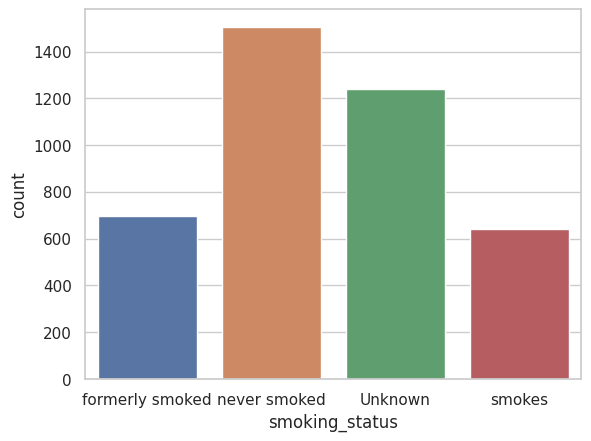

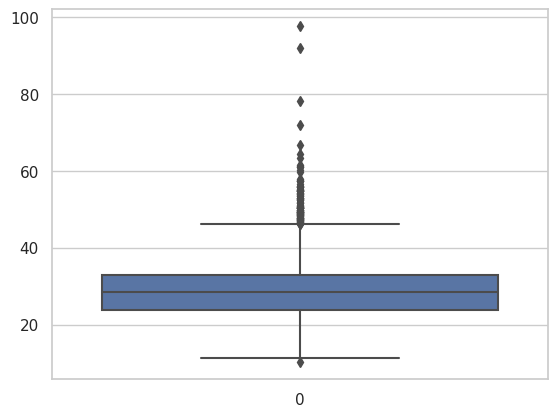

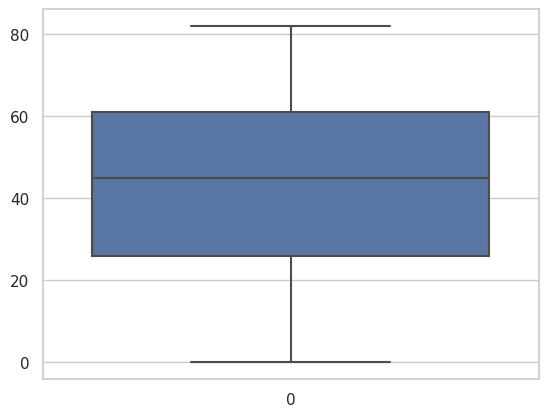

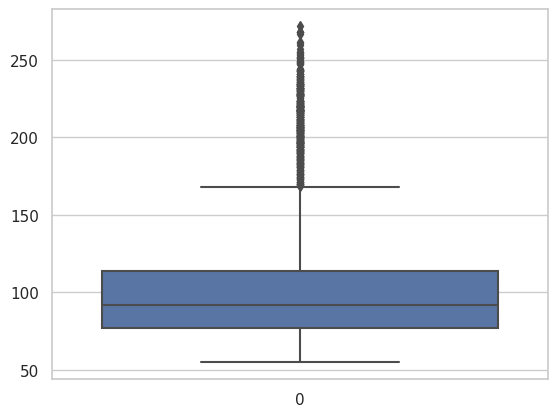

In [49]:
sns.countplot(x='smoking_status', data=df_train)
plt.show()

sns.boxplot(df_train['bmi'])
plt.show()
sns.boxplot(df_train['age'])
plt.show()

sns.boxplot(df_train['avg_glucose_level'])
plt.show()

In [50]:
#Windsorizing to BMI and avg_glucose_level to handle of outliers

def windsorize(x):
    pct25, pct75 = np.percentile(x, [25, 75])
    iqr = pct75 - pct25
    lower_whisker = pct25 - iqr * 1.5
    upper_whisker = pct75 + iqr * 1.5
    x_windsor = x.copy()
    x_windsor[x < lower_whisker] = lower_whisker
    x_windsor[x > upper_whisker] = upper_whisker
    return x_windsor

numeric = ["age", "bmi", "avg_glucose_level"]
for i in numeric:
  df_train[i] = windsorize(df_train[i])




In [15]:
def windsorize(x):
    pct25, pct75 = np.percentile(x, [25, 75])
    iqr = pct75 - pct25
    lower_whisker = pct25 - iqr * 1.5
    upper_whisker = pct75 + iqr * 1.5
    x_windsor = x.copy()
    x_windsor[x < lower_whisker] = lower_whisker
    x_windsor[x > upper_whisker] = upper_whisker
    return x_windsor

numeric = ["age", "bmi", "avg_glucose_level"]
for i in numeric:
  df_test[i] = windsorize(df_test[i])

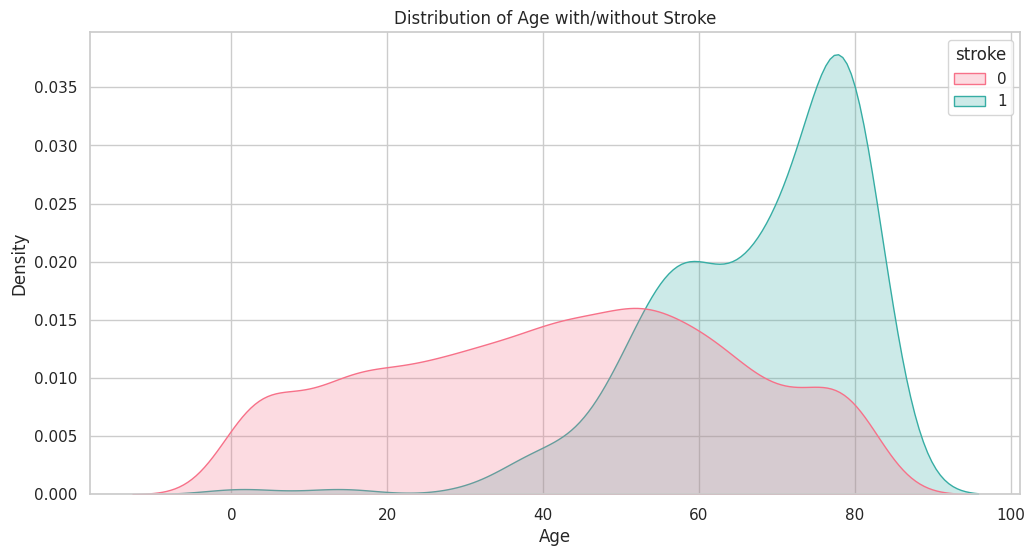

In [51]:
# Distribution of age and stroke on training data
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.kdeplot(data=df_train, x="age", hue="stroke", fill=True, common_norm=False, palette="husl")

plt.title("Distribution of Age with/without Stroke")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

Individuals higher in age tend to have more incidents of stroke compared to no stroke. The peak age is at around 78 or 79 years of age. The likelihood of getting a stroke dramatically increases after the age of 40

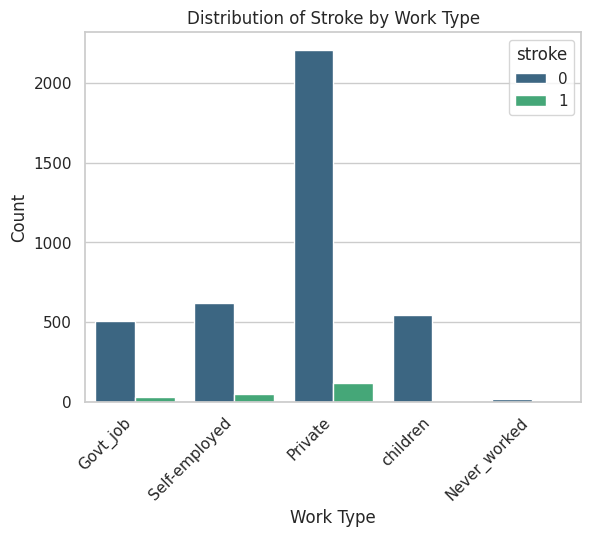

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plotting a bar plot for work_type and stroke
sns.countplot(data=df_train, x=
              "work_type", hue="stroke", palette="viridis")

plt.title("Distribution of Stroke by Work Type")
plt.xlabel("Work Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility

plt.show()

The most documented Work Type between people who have or had not a stroke are people who work in private sector employment. These employees have the most instances of strokes, while "Never_Worked" have no instances.

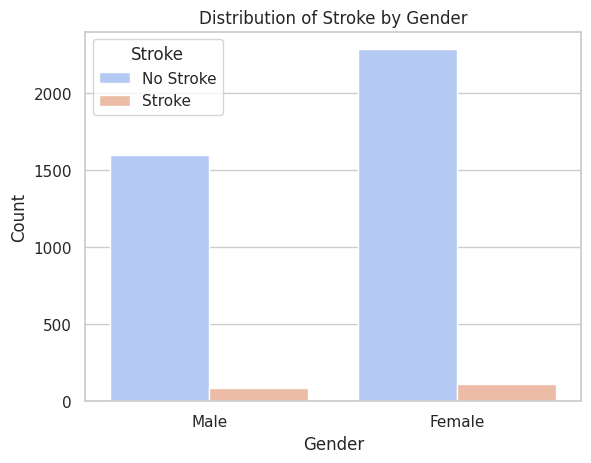

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_train, x="gender", hue="stroke", palette="coolwarm")

plt.title("Distribution of Stroke by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Stroke", labels=["No Stroke", "Stroke"])

plt.show()

In this dataset, females tend to have more strokes than men, but the difference is very minimal, and may not pose significant in understanding the relationship between gender and stroke.

<ipython-input-54-36f25534237a>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_stroke = df_train.corr()['stroke'].sort_values(ascending=False)


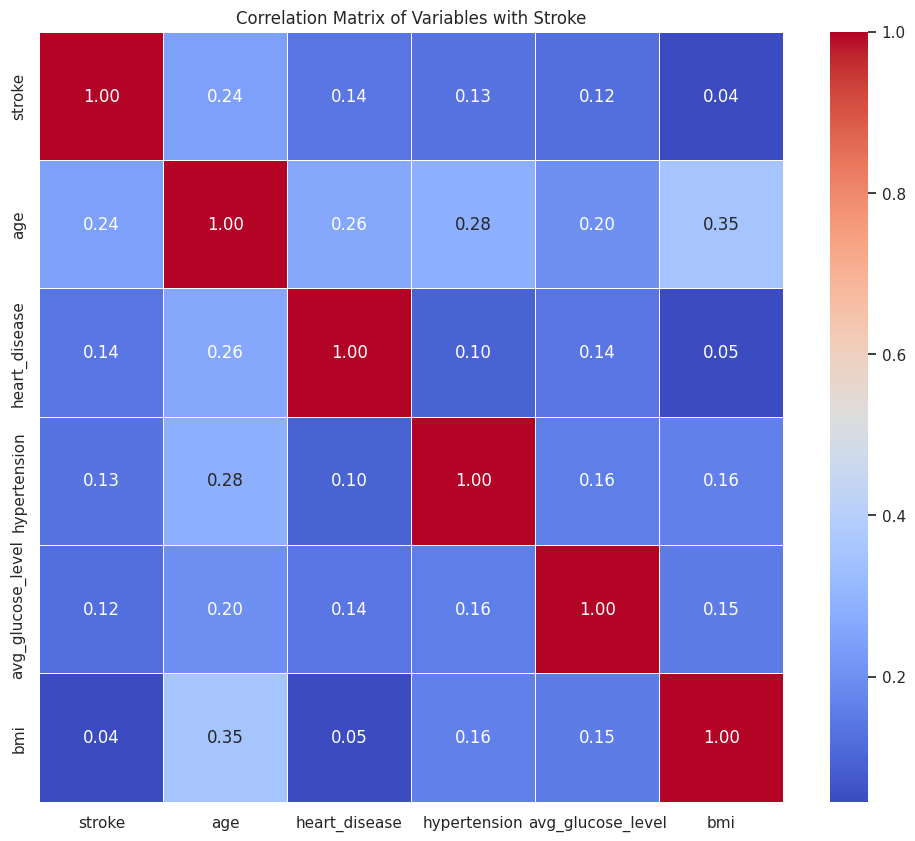

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_with_stroke = df_train.corr()['stroke'].sort_values(ascending=False)
correlation_matrix = df_train[correlation_with_stroke.index].corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

plt.title('Correlation Matrix of Variables with Stroke')

plt.show()

A lot of these variables don't appear to have strong relationships with the 'stroke' variable, because the greatest positive correlation is age = 0.24, while the greatest negative correlation is -0.37.

In [55]:
# Creating dummy variables
categorical_columns = ['smoking_status', 'Residence_type', 'gender', 'ever_married', 'work_type']
df_train = pd.get_dummies(df_train, columns=categorical_columns, drop_first=True)

# Check the first few rows of the updated DataFrame
print(df_train.head())


    age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0  36.0             0              0           65.87000  32.2       0   
1  45.0             0              0           68.66000  25.3       0   
2  58.0             0              0          168.63625  30.7       0   
3  61.0             0              0           69.88000  27.1       0   
4  78.0             0              0          103.86000  30.6       0   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                               1                            0   
1                               0                            1   
2                               0                            0   
3                               0                            1   
4                               0                            0   

   smoking_status_smokes  Residence_type_Urban  gender_Male  ever_married_Yes  \
0                      0                     1            1                 1   
1 

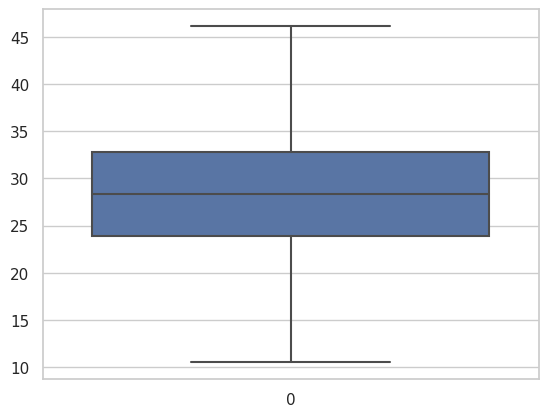

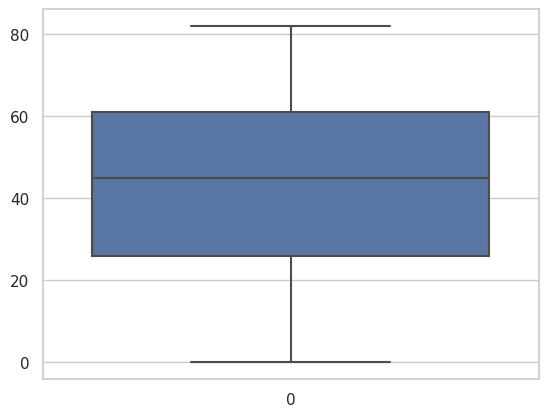

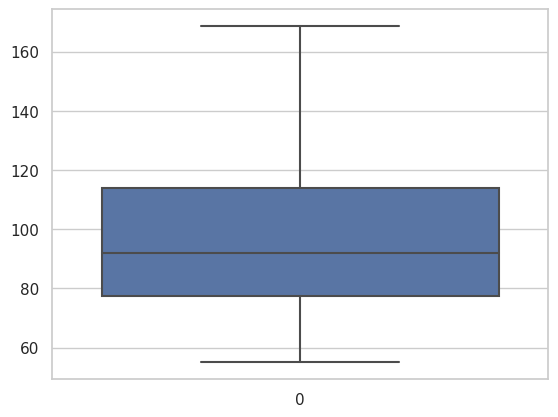

In [56]:

#Checking
sns.boxplot(df_train['bmi'])
plt.show()
sns.boxplot(df_train['age'])
plt.show()
sns.boxplot(df_train['avg_glucose_level'])
plt.show()

In [57]:
#first, just going to do a quick-recheck to make sure the data is ready to go
#lets make sure all columns are present in both datasets


print("checking all columns: ")
wrong_columns = 0
for column in df_test.columns:
    if column not in df_train.columns:
        print(f"The column '{column}' is not present in both dataframes.")
        wrong_columns += 1

if wrong_columns == 0:
  print("All columns are the same, we're good to go", '\n')
elif wrong_columns > 0:
    print("we have a problem: testing and training columns do not match")

#now lets check the data, and if needed, we'll normalize for kNN
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
print(df_train[numerical_columns].head())
print(df_test[numerical_columns].head())

#looks like none of it has been normalized. For this knn section, I'd like to normalize the data,
#otherwise our distance metrics will be all messed up, particularly because of the hot encoded variables

checking all columns: 
The column 'gender' is not present in both dataframes.
The column 'ever_married' is not present in both dataframes.
The column 'work_type' is not present in both dataframes.
The column 'Residence_type' is not present in both dataframes.
The column 'smoking_status' is not present in both dataframes.
we have a problem: testing and training columns do not match
    age  avg_glucose_level   bmi
0  36.0           65.87000  32.2
1  45.0           68.66000  25.3
2  58.0          168.63625  30.7
3  61.0           69.88000  27.1
4  78.0          103.86000  30.6
    age  avg_glucose_level   bmi
0  58.0              87.96  39.2
1   8.0             110.89  17.6
2  70.0              69.04  35.9
3  47.0             210.95  50.1
4  74.0             205.84  54.6


# KNN

In [20]:
#maxmin normalization for knn:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)


def pn(x):
    print(x,'\n')
    return

df_train_encoded = df_train.copy()
df_test_encoded = df_test.copy()
#max min the numerical columns
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
df_train_encoded[numerical_columns] = df_train_encoded[numerical_columns].apply(maxmin)
df_test_encoded[numerical_columns] = df_test_encoded[numerical_columns].apply(maxmin)

# Check the first few rows after normalization
pn("Maxmin training data:")
pn(df_train_encoded[numerical_columns].head())
#yay it worked!
pn("Maxmin testing data: ")
pn(df_test_encoded[numerical_columns].head())
#ok, both sets have been successfully normalized. Now we are ready to actually to kNN.



Maxmin training data: 

        age  avg_glucose_level       bmi
0  0.438477           0.094700  0.608146
1  0.548340           0.119278  0.414326
2  0.707031           1.000000  0.566011
3  0.743652           0.130025  0.464888
4  0.951172           0.429366  0.563202 

Maxmin testing data:  

        age  avg_glucose_level       bmi
0  0.706745           0.279632  0.789736
1  0.095797           0.475657  0.173913
2  0.853372           0.117888  0.695652
3  0.572336           1.000000  1.000000
4  0.902248           1.000000  1.000000 



51 



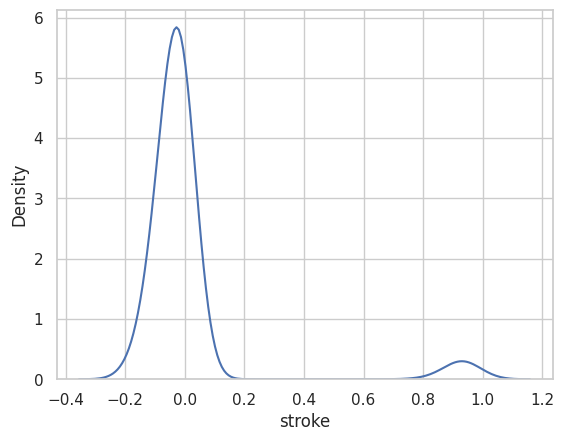

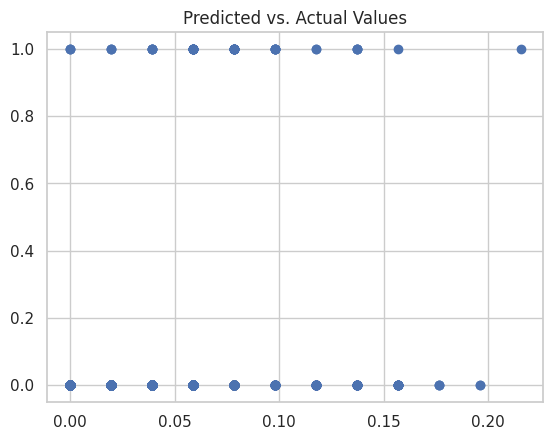

R2: 0.037308058829968904
RMSE:  0.21154832766265794


In [58]:
#kNN time:
#specify our x and y splits using the pre-split data
#most of what is below is a slightly modified version of our class notes
y_train = df_train_encoded['stroke']
y_test = df_test_encoded['stroke']

X_train_knn = df_train_encoded.drop('stroke', axis = 1)
X_test_knn = df_test_encoded.drop('stroke', axis = 1)

TSS = np.sum( (y_test - y_train.mean())**2 )
N_test = len(y_test)

#Now lets find the optimal k
k_bar = 70
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNRegression(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train_knn,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test_knn) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    y_hat = fitted_model.predict(X_train_knn) # Predict values for training set
    SSE_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE_test) # Lowest recorded SSE
min_index = np.where(SSE_test==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index][0] # Find the optimal value of k
      #note: added the [0] here b/c this was being returned as an 0-index array: [k-star] instead of the integer itself, k-star
pn(k_star)

## Fit optimal model:
model = KNeighborsRegressor(n_neighbors=max(3,k_star))
knn_star = model.fit(X_train_knn,y_train)
y_hat_knn = knn_star.predict(X_test_knn)
residuals_knn = y_test - y_hat_knn


## Residual plot:
sns.kdeplot(residuals_knn)
plt.show()

## True versus predicted plot:
plt.scatter(x=y_hat_knn,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()

## Metrics:
SSE_knn = np.sum( (y_test-y_hat_knn)**2 )
MSE_knn = SSE_knn/N_test
RMSE_knn = (SSE_knn/N_test)**(1/2)
R2_knn = 1 - SSE_knn/TSS

print("R2:", R2_knn)
print("RMSE: ", RMSE_knn)




The low R^2 indicates that there are likely very many other variables, not included in our regression/part of the error term, which contribute to stroke occurances outside of just the variables we included. This is not surprising, as someone's health is a complex function of many, many factors (diet, exercise, location, genetic predispositions, etc). The RMSE is approximately 0.2, indicated that the model's predictions are on average within 20% of the actual stroke values in our maxmin normalized scale. Given that kNN is a non-parametric, instance-based learning method, this level of accuracy suggests that our choice of features, the number of neighbors (k), and our distance metric are reasonably well-tuned for capturing the underlying patterns in the data. We did windsorize the data, so it is likely not outliers that are preventing the model from doing a better job. It is also possible that there are irrelevant features we included which are reducing the accuracy of the model. Lastly, perhaps there is a better method of dealing with our missing values, particularly in the BMI category (we replace missings's with the mean), which if handeled better would increase the performance of our model.

# Decision Tree

In [59]:
y_train = df_train['stroke']
X_train = df_train.drop('stroke',axis=1)
y_test = df_test['stroke']
X_test = df_test.drop('stroke',axis=1)

In [60]:
#Because the target variable is binary, using a Decision Tree Regressor is not not be appropriate as proven below with the negative R2 and RMSE scores instead a classification algorithm should be used.
depths = range(1, 20)
r2_scores = []
rmse_scores = []

for depth in depths:

    # Construct an appropriate matrix of regressors/features, and fit a tree to the data.
    model_tree = tree.DecisionTreeRegressor(max_depth=depth)
    cart = model_tree.fit(X_train, y_train)



    # Predict and evaluate the model compute the  𝑅2and RMSE on the test set of a variety of depths
    y_pred_tree = model_tree.predict(X_test)
    r2_tree = r2_score(y_test, y_pred_tree)
    rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)
    r2_scores.append(r2_tree)
    rmse_scores.append(rmse_tree)


for i, depth in enumerate(depths):
    print(f"Depth: {depth}, R^2: {r2_scores[i]}, RMSE: {rmse_scores[i]}")





ValueError: ignored

In [61]:


depths = range(1, 20)
accuracy_scores = []

for depth in depths:

    model_tree = tree.DecisionTreeClassifier(max_depth=depth)
    model_tree.fit(X_train, y_train)


    y_pred_tree = model_tree.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred_tree)
    accuracy_scores.append(accuracy)


    cm = confusion_matrix(y_test, y_pred_tree)


    print(f"Depth: {depth}, Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{cm}\n")



ValueError: ignored

In [62]:
classifier = tree.DecisionTreeClassifier(random_state=42, max_depth=5)
classifier.fit(X_train, y_train)

# Predictions from the classification tree
y_pred=classifier.predict(X_test)

# Visualize results:
plt.figure(figsize=(20,10))
tree.plot_tree(classifier ,filled=True,feature_names=X_train.columns, class_names=["1","2"])

ValueError: ignored

In [63]:
# Compute confusion matrix
tab = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
acc = (tab.iloc[0, 0] + tab.get(1, {}).get(1, 0)) / tab.to_numpy().sum()
print(acc)
print(tab)
accuracy_method_1 = tab.iloc[0, 0] / tab.iloc[0].sum() if 0 in tab else 0
accuracy_method_2 = tab.get(1, {}).get(1, 0) / tab.iloc[1].sum() if 1 in tab else 0


NameError: ignored

If an individual's age is less than or equal to 70.5 years and their average glucose level is less than or equal to 64.575, and they do not have heart disease, then they are most likely to be classified as class 1.
An individual with a bmi less than or equal to 24.9, regardless of age, would also be classified as class 1.
The tree suggests that age is the most significant feature, followed by average glucose level, heart disease, and bmi.
The accuracy reported below the tree indicates that the Decision Tree Classifier was able to correctly predict the absence of stroke (class 0) in 188 cases out of 197, but it did not correctly predict any instances of stroke (class 1), as indicated by the 7 false negatives and 0 true positives in the confusion matrix. The accuracy is high primarily because of a large number of true negatives (correctly predicted no stroke cases), which can be misleading if the dataset is imbalanced with many more no stroke cases than stroke cases.

LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
# Bit of data cleaning before I proceed
dfTr = df_train
dfTe = df_test
# First I'll just do numerical values
numerics = ['age','avg_glucose_level','bmi']
X_num = dfTr.loc[:,numerics]
y = dfTr['stroke']
reg = LinearRegression().fit(X_num,y)
print(reg.score(X_num, y)) # R-squared: ~0.0620
X_num_test = dfTe.loc[:,numerics]
X_num_predict = reg.predict(X_num_test)
y_test = dfTe['stroke']
from sklearn.metrics import mean_squared_error as mse
import math
print(math.sqrt(mse(y_test, X_num_predict))) # RMSE: 0.187

The linear regression above is applied to predict the 'stroke' variable based on selected numerical features from the dataset. The features considered are 'age,' 'avg_glucose_level,' and 'bmi'. A value of 0.0620 for the R-squared value indicates that the linear regression model explains only about 6.2% of the variability in the dependent variable (‘stroke’). In other words, the independent variables ('age', 'avg_glucose_level', 'bmi') used in our model account for a relatively small proportion of the total variance in the dependent variable. The RMSE value of 0.187 indicates that, on average, our linear regression model’s predictions deviate from the true values by approximately 0.187 units. The RMSE of 0.187 being relatively low, indicates that the model has a good level of accuracy in capturing the underlying patterns in the data.